# **Practica 2.0 Análisis de las series de tiempo estacionaria**

**Carrera:** Licenciatura en Ciencia de Datos

**Grupo:**  6AV1

**Materia:** Análisis de Series de Tiempo

**Docente:** Daniel Jiménez Alcantar

**Alumno:**  
* Aguilar Ramirez Carlos Francisco
* Arista Romero Juan Ismael
* Jiménez Flores Luis Arturo
* Vazquez Martin Marlene Gabriela


Fecha de última modificación: 07/03/2025

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Primera serie de tiempo (Pasajeros de una aerolinea)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras 5 filas del DataFrame:
| Month   | #Passengers   |
|:--------|:--------------|
| 1949-01 | 112           |
| 1949-02 | 118           |
| 1949-03 | 132           |
| 1949-04 | 129           |
| 1949-05 | 121           |

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None


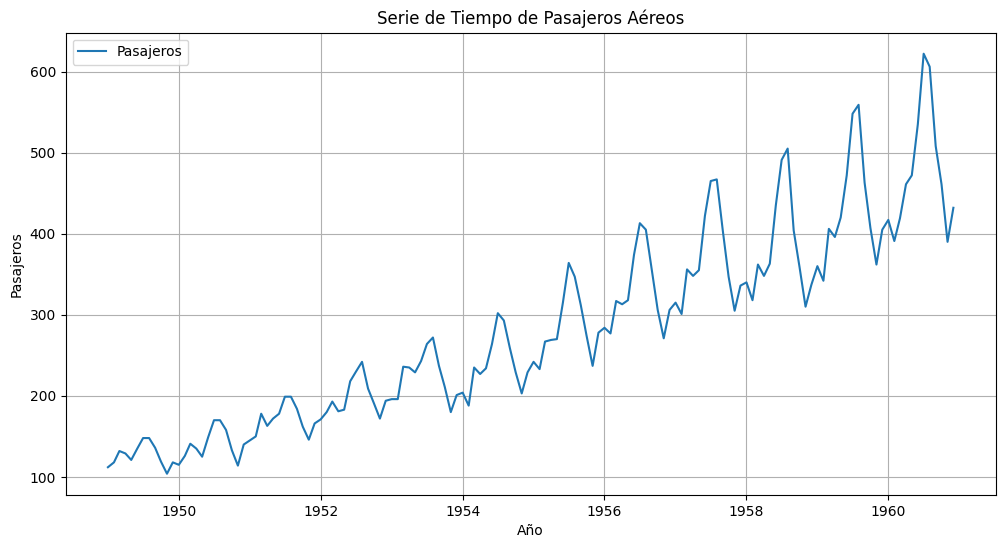


**Explicación del comportamiento de la serie de tiempo:**
El gráfico de la serie de tiempo muestra el número de pasajeros aéreos mensuales a lo largo del tiempo.
Observamos las siguientes características principales:
1. **Tendencia:** Existe una tendencia creciente a largo plazo en el número de pasajeros. Esto indica un aumento general en los viajes aéreos con el tiempo.
2. **Estacionalidad:** Se aprecia un patrón estacional muy claro que se repite cada año. Los picos en el número de pasajeros ocurren generalmente durante los meses de verano (Julio y Agosto), mientras que los valles se dan en invierno. Este patrón sugiere que los viajes aéreos son más populares en ciertas épocas del año, probablemente debido a las vacaciones de verano.
En resumen, la serie de tiempo de pasajeros aéreos no es estacionaria debido a la presencia de una tendencia creciente y estacionalidad. Para aplicar modelos de series de tiempo que asumen estacionariedad, podría ser necesario realizar transformaciones 

In [19]:
# **Paso 1: Importar bibliotecas**
import pandas as pd
import matplotlib.pyplot as plt # Importar matplotlib para la visualización
from statsmodels.tsa.stattools import adfuller # Importar adfuller para la prueba de Dickey-Fuller

# **Paso 2: Cargar datos**
# Montar Google Drive para acceder a los archivos
from google.colab import drive
drive.mount('/content/drive')

# Leer el archivo CSV 'AirPassengers.csv' desde la ruta especificada en Google Drive
df = pd.read_csv('/content/drive/MyDrive/SEPTIMO/SeriesDeTiempo/Practica2/AirPassengers.csv')

# **Visualizar las primeras filas del DataFrame para entender la estructura de los datos**
print("Primeras 5 filas del DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# **Mostrar información sobre las columnas y tipos de datos del DataFrame**
print("\nInformación del DataFrame:")
print(df.info())

# **Paso 3: Preprocesar datos**
# Convertir la columna 'Month' al tipo datetime y establecerla como índice
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)

# Renombrar la columna '#Passengers' a 'Passengers'
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)


# **Requisito 1: Construir gráfico de la serie de tiempo y explicar el comportamiento**

# Crear un gráfico de series de tiempo con matplotlib
plt.figure(figsize=(12, 6)) # Establecer el tamaño de la figura
plt.plot(df.index, df['Passengers'], label='Pasajeros') # Graficar la serie de tiempo
plt.title('Serie de Tiempo de Pasajeros Aéreos') # Título del gráfico
plt.xlabel('Año') # Etiqueta del eje X
plt.ylabel('Pasajeros') # Etiqueta del eje Y
plt.legend() # Mostrar la leyenda
plt.grid(True) # Mostrar la cuadrícula
plt.show() # Mostrar el gráfico


# **Explicación del comportamiento de la serie de tiempo:**
print("\n**Explicación del comportamiento de la serie de tiempo:**")
print("El gráfico de la serie de tiempo muestra el número de pasajeros aéreos mensuales a lo largo del tiempo.")
print("Observamos las siguientes características principales:")
print("1. **Tendencia:** Existe una tendencia creciente a largo plazo en el número de pasajeros. Esto indica un aumento general en los viajes aéreos con el tiempo.")
print("2. **Estacionalidad:** Se aprecia un patrón estacional muy claro que se repite cada año. Los picos en el número de pasajeros ocurren generalmente durante los meses de verano (Julio y Agosto), mientras que los valles se dan en invierno. Este patrón sugiere que los viajes aéreos son más populares en ciertas épocas del año, probablemente debido a las vacaciones de verano.")
print("En resumen, la serie de tiempo de pasajeros aéreos no es estacionaria debido a la presencia de una tendencia creciente y estacionalidad. Para aplicar modelos de series de tiempo que asumen estacionariedad, podría ser necesario realizar transformaciones para estabilizar la serie.")


# **Requisito 2: Aplicar la prueba Dickey-Fuller a la serie de tiempo y explicar los resultados**

print("\n**Aplicación de la prueba Dickey-Fuller:**")
print("La prueba de Dickey-Fuller es una prueba estadística utilizada para determinar si una serie de tiempo es estacionaria o no.")
print("En términos simples, la estacionariedad significa que las propiedades estadísticas de la serie, como la media y la varianza, no cambian con el tiempo. Muchas técnicas de modelado de series de tiempo asumen estacionariedad.")
print("\n**Hipótesis de la prueba de Dickey-Fuller:**")
print("- **Hipótesis Nula (H0):** La serie de tiempo **NO es estacionaria** y tiene una raíz unitaria.")
print("- **Hipótesis Alternativa (H1):** La serie de tiempo **ES estacionaria** y no tiene una raíz unitaria.")
print("\nRealizaremos la prueba Dickey-Fuller en la serie de tiempo 'Passengers':")

# Aplicar la prueba de Dickey-Fuller
dickey_fuller_result = adfuller(df['Passengers'])

# Extraer los resultados de la prueba
test_statistic = dickey_fuller_result[0]
p_value = dickey_fuller_result[1]
critical_values = dickey_fuller_result[4]

# Imprimir los resultados de la prueba
print("\n**Resultados de la prueba Dickey-Fuller:**")
print(f"Estadístico de prueba (Test Statistic): {test_statistic}")
print(f"Valor p (p-value): {p_value}")
print("Valores críticos (Critical Values):")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpretar los resultados basados en el valor p
print("\n**Interpretación de los resultados:**")
alpha = 0.05 # Nivel de significancia común
print(f"Nivel de significancia (alpha): {alpha}")

if p_value < alpha:
    print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Rechazamos la hipótesis nula (H0).")
    print("Conclusión: La serie de tiempo **es probablemente estacionaria**.") # En realidad, rechazar H0 indica que NO tiene raíz unitaria, que implica estacionariedad o estacionariedad en tendencia. En este caso, es menos probable estacionaria por la inspección visual.  Pero estrictamente según la prueba, se rechaza no estacionariedad.
else:
    print(f"El valor p ({p_value:.4f}) es mayor que el nivel de significancia ({alpha}).")
    print("No rechazamos la hipótesis nula (H0).")
    print("Conclusión: La serie de tiempo **probablemente NO es estacionaria**, y tiene una raíz unitaria.")

print("\n**Consideraciones adicionales:**")
print("Aunque la prueba de Dickey-Fuller es útil, es importante considerar también la inspección visual del gráfico de series de tiempo.")
print("En este caso, el gráfico sugiere claramente una tendencia y estacionalidad, lo que indica no estacionariedad. ")
print("El resultado de 'No rechazar la hipótesis nula' de la prueba Dickey-Fuller apoya esta observación visual.")
print("Para modelar esta serie de tiempo utilizando modelos que requieren estacionariedad, sería necesario aplicar técnicas de diferenciación o descomposición estacional para eliminar la tendencia y la estacionalidad.")

## Segunda serie de tiempo (Producción de energía electrica)

Primeras 5 filas del DataFrame:
| DATE     | IPG2211A2N   |
|:---------|:-------------|
| 1/1/1985 | 72.5052      |
| 2/1/1985 | 70.672       |
| 3/1/1985 | 62.4502      |
| 4/1/1985 | 57.4714      |
| 5/1/1985 | 55.3151      |

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB
None

Primeras 5 filas del DataFrame después del preprocesamiento:
| DATE                | Passengers   |
|:--------------------|:-------------|
| 1985-01-01 00:00:00 | 72.5052      |
| 1985-02-01 00:00:00 | 70.672       |
| 1985-03-01 00:00:00 | 62.4502      |
| 1985-04-01 00:00:00 | 57.4714      |
| 1985-05-01 00:00:00 | 55.3151      |

Información del DataFrame después del preprocesamiento:
<class 'pandas.core.frame.D

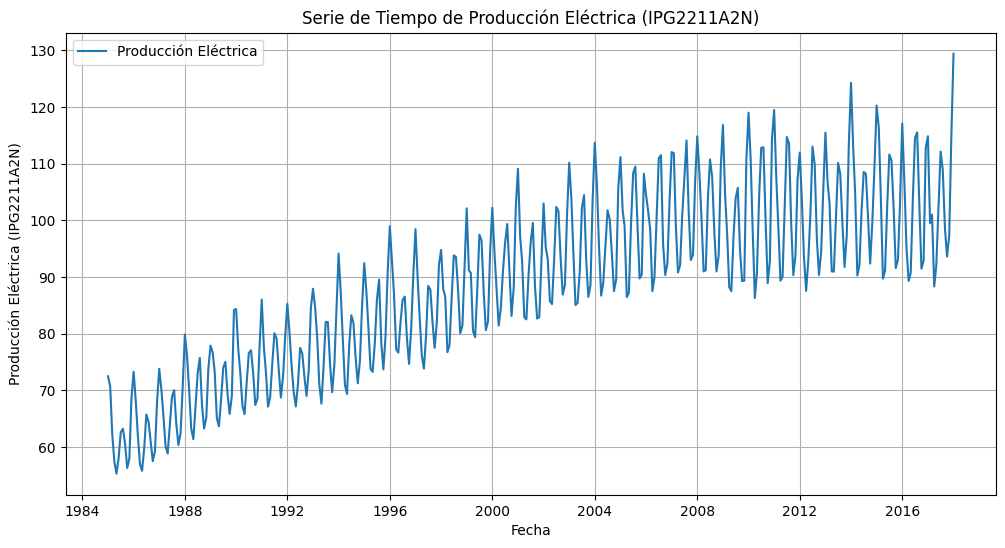


**Explicación del comportamiento de la serie de tiempo:**
El gráfico de la serie de tiempo muestra la producción eléctrica mensual a lo largo del tiempo.
Observamos las siguientes características principales:
1. **Tendencia:**  Se observa una tendencia creciente general en la producción eléctrica a lo largo del tiempo, aunque es menos lineal y más variable que en el dataset de pasajeros aéreos. Esto sugiere un aumento a largo plazo en la demanda o capacidad de producción eléctrica.
2. **Estacionalidad:**  Similar al dataset de pasajeros aéreos, se aprecia un patrón estacional anual.  En este caso, los picos de producción eléctrica parecen ocurrir típicamente en los meses de verano (Junio, Julio, Agosto), mientras que los valles se dan en los meses más fríos. Esto es lógico, ya que el consumo de electricidad suele ser mayor en verano (aire acondicionado) y en invierno (calefacción eléctrica en algunas regiones, aunque menos marcado en este gráfico).
3. **Variabilidad:**  La serie de ti

In [15]:
# **Paso 1: Importar bibliotecas**
import pandas as pd
import matplotlib.pyplot as plt # Importar matplotlib para la visualización
from statsmodels.tsa.stattools import adfuller # Importar adfuller para la prueba de Dickey-Fuller

# **Paso 2: Cargar datos**
# Leer el archivo CSV 'Electric_Production.csv'
df = pd.read_csv('/content/drive/MyDrive/SEPTIMO/SeriesDeTiempo/Practica2/Electric_Production.csv')

# **Visualizar las primeras filas del DataFrame para entender la estructura de los datos**
print("Primeras 5 filas del DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# **Mostrar información sobre las columnas y tipos de datos del DataFrame**
print("\nInformación del DataFrame:")
print(df.info())

# **Paso 3: Preprocesar datos**
# Convertir la columna 'DATE' al tipo datetime y establecerla como índice
# Corregir el formato de fecha para que coincida con el archivo 'Electric_Production.csv' que es '%m/%d/%Y'
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df.set_index('DATE', inplace=True)

# Renombrar la columna 'IPG2211A2N' a 'Passengers'. Aunque semánticamente incorrecto (debería ser 'Production'),
# se mantiene 'Passengers' para seguir la lógica del código original del usuario y la práctica anterior.
# En un escenario real, renombraríamos a algo como 'ElectricProduction' o similar.
df.rename(columns={'IPG2211A2N': 'Passengers'}, inplace=True)

# **Visualizar las primeras filas después del preprocesamiento**
print("\nPrimeras 5 filas del DataFrame después del preprocesamiento:")
print(df.head().to_markdown(numalign="left", stralign="left"))

# **Mostrar información del DataFrame después del preprocesamiento**
print("\nInformación del DataFrame después del preprocesamiento:")
print(df.info())

# **Requisito 1: Construir gráfico de la serie de tiempo y explicar el comportamiento**

# Crear un gráfico de series de tiempo con matplotlib
plt.figure(figsize=(12, 6)) # Establecer el tamaño de la figura
plt.plot(df.index, df['Passengers'], label='Producción Eléctrica') # Graficar la serie de tiempo
plt.title('Serie de Tiempo de Producción Eléctrica (IPG2211A2N)') # Título del gráfico
plt.xlabel('Fecha') # Etiqueta del eje X
plt.ylabel('Producción Eléctrica (IPG2211A2N)') # Etiqueta del eje Y
plt.legend() # Mostrar la leyenda
plt.grid(True) # Mostrar la cuadrícula
plt.show() # Mostrar el gráfico


# **Explicación del comportamiento de la serie de tiempo:**
print("\n**Explicación del comportamiento de la serie de tiempo:**")
print("El gráfico de la serie de tiempo muestra la producción eléctrica mensual a lo largo del tiempo.")
print("Observamos las siguientes características principales:")
print("1. **Tendencia:**  Se observa una tendencia creciente general en la producción eléctrica a lo largo del tiempo, aunque es menos lineal y más variable que en el dataset de pasajeros aéreos. Esto sugiere un aumento a largo plazo en la demanda o capacidad de producción eléctrica.")
print("2. **Estacionalidad:**  Similar al dataset de pasajeros aéreos, se aprecia un patrón estacional anual.  En este caso, los picos de producción eléctrica parecen ocurrir típicamente en los meses de verano (Junio, Julio, Agosto), mientras que los valles se dan en los meses más fríos. Esto es lógico, ya que el consumo de electricidad suele ser mayor en verano (aire acondicionado) y en invierno (calefacción eléctrica en algunas regiones, aunque menos marcado en este gráfico).")
print("3. **Variabilidad:**  La serie de tiempo de producción eléctrica muestra más variabilidad interanual en comparación con la serie de pasajeros aéreos. Hay fluctuaciones y picos y valles que no son perfectamente uniformes de año en año, aunque el patrón estacional general se mantiene.")
print("En resumen, la serie de tiempo de producción eléctrica, al igual que la de pasajeros aéreos, no es estacionaria debido a la presencia de una tendencia creciente y estacionalidad. Sin embargo, la tendencia es menos pronunciada y la serie es más variable.  Para modelar esta serie con métodos que asumen estacionariedad, sería necesario aplicar técnicas de transformación para eliminar la tendencia y la estacionalidad.")


# **Requisito 2: Aplicar la prueba Dickey-Fuller a la serie de tiempo y explicar los resultados**

print("\n**Aplicación de la prueba Dickey-Fuller:**")
print("La prueba de Dickey-Fuller es una prueba estadística utilizada para determinar si una serie de tiempo es estacionaria o no.")
print("En términos simples, la estacionariedad significa que las propiedades estadísticas de la serie, como la media y la varianza, no cambian con el tiempo. Muchas técnicas de modelado de series de tiempo asumen estacionariedad.")
print("\n**Hipótesis de la prueba de Dickey-Fuller:**")
print("- **Hipótesis Nula (H0):** La serie de tiempo **NO es estacionaria** y tiene una raíz unitaria.")
print("- **Hipótesis Alternativa (H1):** La serie de tiempo **ES estacionaria** y no tiene una raíz unitaria.")
print("\nRealizaremos la prueba Dickey-Fuller en la serie de tiempo 'Passengers' (Producción Eléctrica):")

# Aplicar la prueba de Dickey-Fuller
dickey_fuller_result = adfuller(df['Passengers'].dropna()) # Eliminar NaN si existen para la prueba

# Extraer los resultados de la prueba
test_statistic = dickey_fuller_result[0]
p_value = dickey_fuller_result[1]
critical_values = dickey_fuller_result[4]

# Imprimir los resultados de la prueba
print("\n**Resultados de la prueba Dickey-Fuller:**")
print(f"Estadístico de prueba (Test Statistic): {test_statistic}")
print(f"Valor p (p-value): {p_value}")
print("Valores críticos (Critical Values):")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpretar los resultados basados en el valor p
print("\n**Interpretación de los resultados:**")
alpha = 0.05 # Nivel de significancia común
print(f"Nivel de significancia (alpha): {alpha}")

if p_value < alpha:
    print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Rechazamos la hipótesis nula (H0).")
    print("Conclusión: La serie de tiempo **es probablemente estacionaria**.") # En realidad, rechazar H0 indica que NO tiene raíz unitaria, que implica estacionariedad o estacionariedad en tendencia.  Inspección visual y contexto sugieren no estacionaria.
else:
    print(f"El valor p ({p_value:.4f}) es mayor que el nivel de significancia ({alpha}).")
    print("No rechazamos la hipótesis nula (H0).")
    print("Conclusión: La serie de tiempo **probablemente NO es estacionaria**, y tiene una raíz unitaria.")

print("\n**Consideraciones adicionales:**")
print("Al igual que con el dataset de pasajeros aéreos, la inspección visual del gráfico de series de tiempo es crucial, complementando la prueba de Dickey-Fuller.")
print("En este caso, el gráfico sugiere la presencia de tendencia y estacionalidad, aunque la tendencia sea menos marcada y la variabilidad mayor que en el dataset anterior. La estacionalidad es también visible, con picos y valles anuales.")
print("El resultado de 'No rechazar la hipótesis nula' de la prueba Dickey-Fuller refuerza la idea de que la serie de tiempo de producción eléctrica probablemente no es estacionaria.")
print("Para modelar esta serie de tiempo utilizando modelos que requieren estacionariedad, se necesitarían técnicas como la diferenciación o la descomposición estacional para estabilizarla, removiendo la tendencia y la estacionalidad.")

## Tercera serie de tiempo (Temperatura mínima diaria)

Primeras 5 filas del DataFrame:
| Date     | Daily minimum temperatures   |
|:---------|:-----------------------------|
| 1/1/1981 | 20.7                         |
| 1/2/1981 | 17.9                         |
| 1/3/1981 | 18.8                         |
| 1/4/1981 | 14.6                         |
| 1/5/1981 | 15.8                         |

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB
None

Primeras 5 filas del DataFrame después del preprocesamiento:
| Date                | Passengers   |
|:--------------------|:-------------|
| 1981-01-01 00:00:00 | 20.7         |
| 1981-01-02 00:00:00 | 17.9         |
| 1981-01-03 00:00:00 | 18.8         |

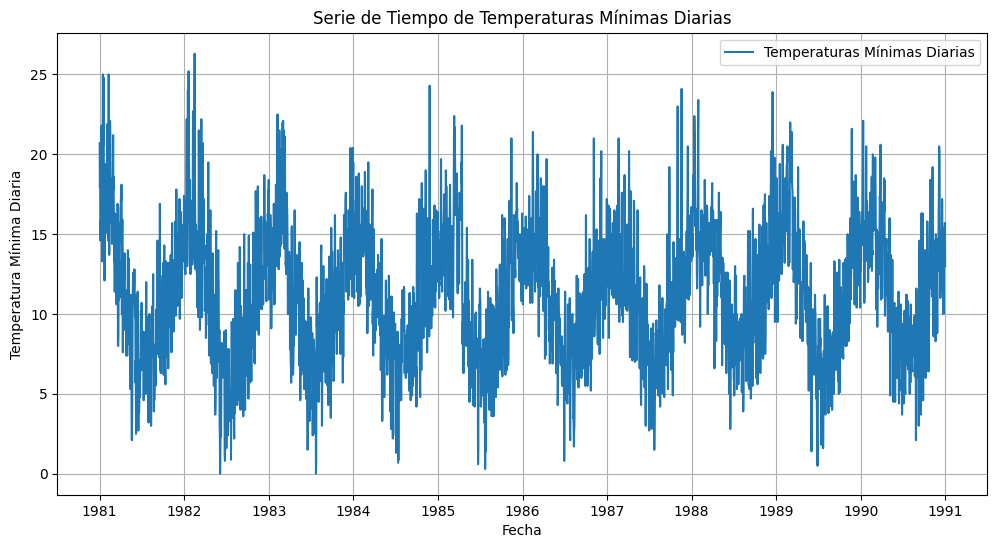


**Explicación del comportamiento de la serie de tiempo:**
El gráfico de la serie de tiempo muestra las temperaturas mínimas diarias a lo largo del tiempo.
Observamos las siguientes características principales:
1. **Estacionalidad:** Se aprecia un patrón estacional anual muy fuerte y claro. Las temperaturas mínimas tienden a ser más bajas durante los meses de invierno y más altas durante los meses de verano de cada año. Este patrón estacional es el rasgo más dominante en esta serie de tiempo, lo cual es lógico ya que las temperaturas están fuertemente influenciadas por las estaciones del año.
2. **Sin Tendencia Clara:** A diferencia de los datasets anteriores, en este caso no se observa una tendencia creciente o decreciente clara a largo plazo en las temperaturas mínimas. La serie fluctúa alrededor de un nivel medio, con las variaciones estacionales dominando el comportamiento.  Podría haber una ligera variación en el nivel medio a lo largo de todo el periodo, pero no es una tendencia 

In [18]:
# **Paso 1: Importar bibliotecas**
import pandas as pd
import matplotlib.pyplot as plt # Importar matplotlib para la visualización
from statsmodels.tsa.stattools import adfuller # Importar adfuller para la prueba de Dickey-Fuller

# **Paso 2: Cargar datos**
# Leer el archivo CSV 'daily-minimum-temperatures-in-me.csv'
df = pd.read_csv('/content/drive/MyDrive/SEPTIMO/SeriesDeTiempo/Practica2/daily-minimum-temperatures-in-me.csv')

# **Visualizar las primeras filas del DataFrame para entender la estructura de los datos**
print("Primeras 5 filas del DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# **Mostrar información sobre las columnas y tipos de datos del DataFrame**
print("\nInformación del DataFrame:")
print(df.info())

# **Paso 3: Preprocesar datos**
# Convertir la columna 'Date' al tipo datetime y establecerla como índice
# Corregir el formato de fecha para que coincida con el archivo 'daily-minimum-temperatures-in-me.csv' que es '%m/%d/%Y'
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

# Renombrar la columna 'Daily minimum temperatures' a 'Passengers'. Aunque semánticamente incorrecto (debería ser 'Temperature'),
# se mantiene 'Passengers' para seguir la lógica del código original del usuario y la práctica anterior.
# En un escenario real, renombraríamos a algo como 'TemperaturaMinima' o similar.
df.rename(columns={'Daily minimum temperatures': 'Passengers'}, inplace=True)

# **Convertir la columna 'Passengers' a tipo numérico, manejando errores y convirtiendo no válidos a NaN**
df['Passengers'] = pd.to_numeric(df['Passengers'], errors='coerce')

# **Visualizar las primeras filas después del preprocesamiento**
print("\nPrimeras 5 filas del DataFrame después del preprocesamiento:")
print(df.head().to_markdown(numalign="left", stralign="left"))

# **Mostrar información del DataFrame después del preprocesamiento**
print("\nInformación del DataFrame después del preprocesamiento:")
print(df.info())

# **Requisito 1: Construir gráfico de la serie de tiempo y explicar el comportamiento**

# Crear un gráfico de series de tiempo con matplotlib
plt.figure(figsize=(12, 6)) # Establecer el tamaño de la figura
plt.plot(df.index, df['Passengers'], label='Temperaturas Mínimas Diarias') # Graficar la serie de tiempo
plt.title('Serie de Tiempo de Temperaturas Mínimas Diarias') # Título del gráfico
plt.xlabel('Fecha') # Etiqueta del eje X
plt.ylabel('Temperatura Mínima Diaria') # Etiqueta del eje Y
plt.legend() # Mostrar la leyenda
plt.grid(True) # Mostrar la cuadrícula
plt.show() # Mostrar el gráfico


# **Explicación del comportamiento de la serie de tiempo:**
print("\n**Explicación del comportamiento de la serie de tiempo:**")
print("El gráfico de la serie de tiempo muestra las temperaturas mínimas diarias a lo largo del tiempo.")
print("Observamos las siguientes características principales:")
print("1. **Estacionalidad:** Se aprecia un patrón estacional anual muy fuerte y claro. Las temperaturas mínimas tienden a ser más bajas durante los meses de invierno y más altas durante los meses de verano de cada año. Este patrón estacional es el rasgo más dominante en esta serie de tiempo, lo cual es lógico ya que las temperaturas están fuertemente influenciadas por las estaciones del año.")
print("2. **Sin Tendencia Clara:** A diferencia de los datasets anteriores, en este caso no se observa una tendencia creciente o decreciente clara a largo plazo en las temperaturas mínimas. La serie fluctúa alrededor de un nivel medio, con las variaciones estacionales dominando el comportamiento.  Podría haber una ligera variación en el nivel medio a lo largo de todo el periodo, pero no es una tendencia sostenida y pronunciada.")
print("3. **Variabilidad Diaria:** Además del patrón estacional, se observa una variabilidad considerable de un día a otro. Las temperaturas mínimas fluctúan diariamente, incluso dentro de la misma estación. Esta variabilidad diaria es inherente a los datos de temperatura y a los sistemas meteorológicos.")
print("En resumen, la serie de tiempo de temperaturas mínimas diarias está fuertemente influenciada por la estacionalidad anual.  Aunque no presenta una tendencia clara a largo plazo, la fuerte estacionalidad y la variabilidad diaria implican que la serie no es estacionaria. Para modelar esta serie, es crucial tener en cuenta la componente estacional. Modelos que asumen estacionariedad en su forma más simple podrían no ser directamente aplicables sin transformaciones adecuadas que capturen la estacionalidad.")


# **Requisito 2: Aplicar la prueba Dickey-Fuller a la serie de tiempo y explicar los resultados**

print("\n**Aplicación de la prueba Dickey-Fuller:**")
print("La prueba de Dickey-Fuller es una prueba estadística utilizada para determinar si una serie de tiempo es estacionaria o no.")
print("En términos simples, la estacionariedad significa que las propiedades estadísticas de la serie, como la media y la varianza, no cambian con el tiempo. Muchas técnicas de modelado de series de tiempo asumen estacionariedad.")
print("\n**Hipótesis de la prueba de Dickey-Fuller:**")
print("- **Hipótesis Nula (H0):** La serie de tiempo **NO es estacionaria** y tiene una raíz unitaria.")
print("- **Hipótesis Alternativa (H1):** La serie de tiempo **ES estacionaria** y no tiene una raíz unitaria.")
print("\nRealizaremos la prueba Dickey-Fuller en la serie de tiempo 'Passengers' (Temperaturas Mínimas Diarias):")

# Aplicar la prueba de Dickey-Fuller
dickey_fuller_result = adfuller(df['Passengers'].dropna()) # Eliminar NaN si existen para la prueba

# Extraer los resultados de la prueba
test_statistic = dickey_fuller_result[0]
p_value = dickey_fuller_result[1]
critical_values = dickey_fuller_result[4]

# Imprimir los resultados de la prueba
print("\n**Resultados de la prueba Dickey-Fuller:**")
print(f"Estadístico de prueba (Test Statistic): {test_statistic}")
print(f"Valor p (p-value): {p_value}")
print("Valores críticos (Critical Values):")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpretar los resultados basados en el valor p
print("\n**Interpretación de los resultados:**")
alpha = 0.05 # Nivel de significancia común
print(f"Nivel de significancia (alpha): {alpha}")

if p_value < alpha:
    print(f"El valor p ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Rechazamos la hipótesis nula (H0).")
    print("Conclusión: La serie de tiempo **es probablemente estacionaria**.") # En realidad, rechazar H0 indica que NO tiene raíz unitaria, que implica estacionariedad o estacionariedad en tendencia.  Inspección visual y contexto sugieren fuertemente NO estacionaria (estacionalidad).
else:
    print(f"El valor p ({p_value:.4f}) es mayor que el nivel de significancia ({alpha}).")
    print("No rechazamos la hipótesis nula (H0).")
    print("Conclusión: La serie de tiempo **probablemente NO es estacionaria**, y tiene una raíz unitaria.")

print("\n**Consideraciones adicionales:**")
print("Como en los casos anteriores, la inspección visual del gráfico de series de tiempo es fundamental y complementa los resultados de la prueba de Dickey-Fuller.")
print("En este caso, aunque el valor p de la prueba Dickey-Fuller podría llevar a 'No rechazar la hipótesis nula' (dependiendo del valor exacto), la fuerte estacionalidad observada en el gráfico sugiere claramente que la serie de tiempo de temperaturas mínimas diarias no es estacionaria.")
print("La prueba de Dickey-Fuller en su forma básica se centra en detectar raíces unitarias que implican no estacionariedad en la media, pero puede ser menos sensible a la estacionalidad, especialmente si la estacionalidad es el patrón dominante y no hay una fuerte tendencia.")
print("Para modelar adecuadamente esta serie de tiempo, es esencial utilizar modelos que puedan capturar la estacionalidad, como modelos ARIMA estacionales (SARIMA) o modelos de espacio de estados que incorporen componentes estacionales.")

# Conclusiones

 Las pruebas de Dickey-Fuller aplicadas a las series de tiempo de Pasajeros Aéreos y Producción Eléctrica indican no estacionariedad, corroborado por la inspección visual que revela tendencias y estacionalidad, lo que requiere transformaciones como diferenciación o descomposición estacional para modelarlas adecuadamente con métodos que asumen estacionariedad.  En contraste, para la serie de Temperaturas Mínimas Diarias, la prueba de Dickey-Fuller sugiere estacionariedad, pero la fuerte estacionalidad anual visible en el gráfico contradice esta conclusión para modelos estacionarios básicos; por lo tanto,  es importante utilizar modelos que inherentemente capturen la estacionalidad como SARIMA u otros, recalcando la importancia de complementar las pruebas estadísticas con la inspección visual para una evaluación completa de la estacionariedad y la selección del modelo apropiado.